# Data Loading

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing

In [19]:
missing_values = df.isnull().sum()

missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [89]:
df[df == 'unknown'].count()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
year                 0
dtype: int64

In [20]:
# Identify columns with the value "unknown"
unknown_counts = df[df == 'unknown'].count()

unknown_columns = unknown_counts[unknown_counts > 0]
unknown_columns

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

In [21]:
# # Replace "unknown" values with the mode of each respective column
# for column in unknown_columns.index:
#     mode_value = df[column].mode()[0]
#     df[column] = df[column].replace('unknown', mode_value)

# # Verify if "unknown" values are replaced
# unknown_after_replacement = df[df == 'unknown'].count()

# unknown_after_replacement[unknown_after_replacement > 0]

In [22]:
# Drop the duplicates
df = df.drop_duplicates()
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


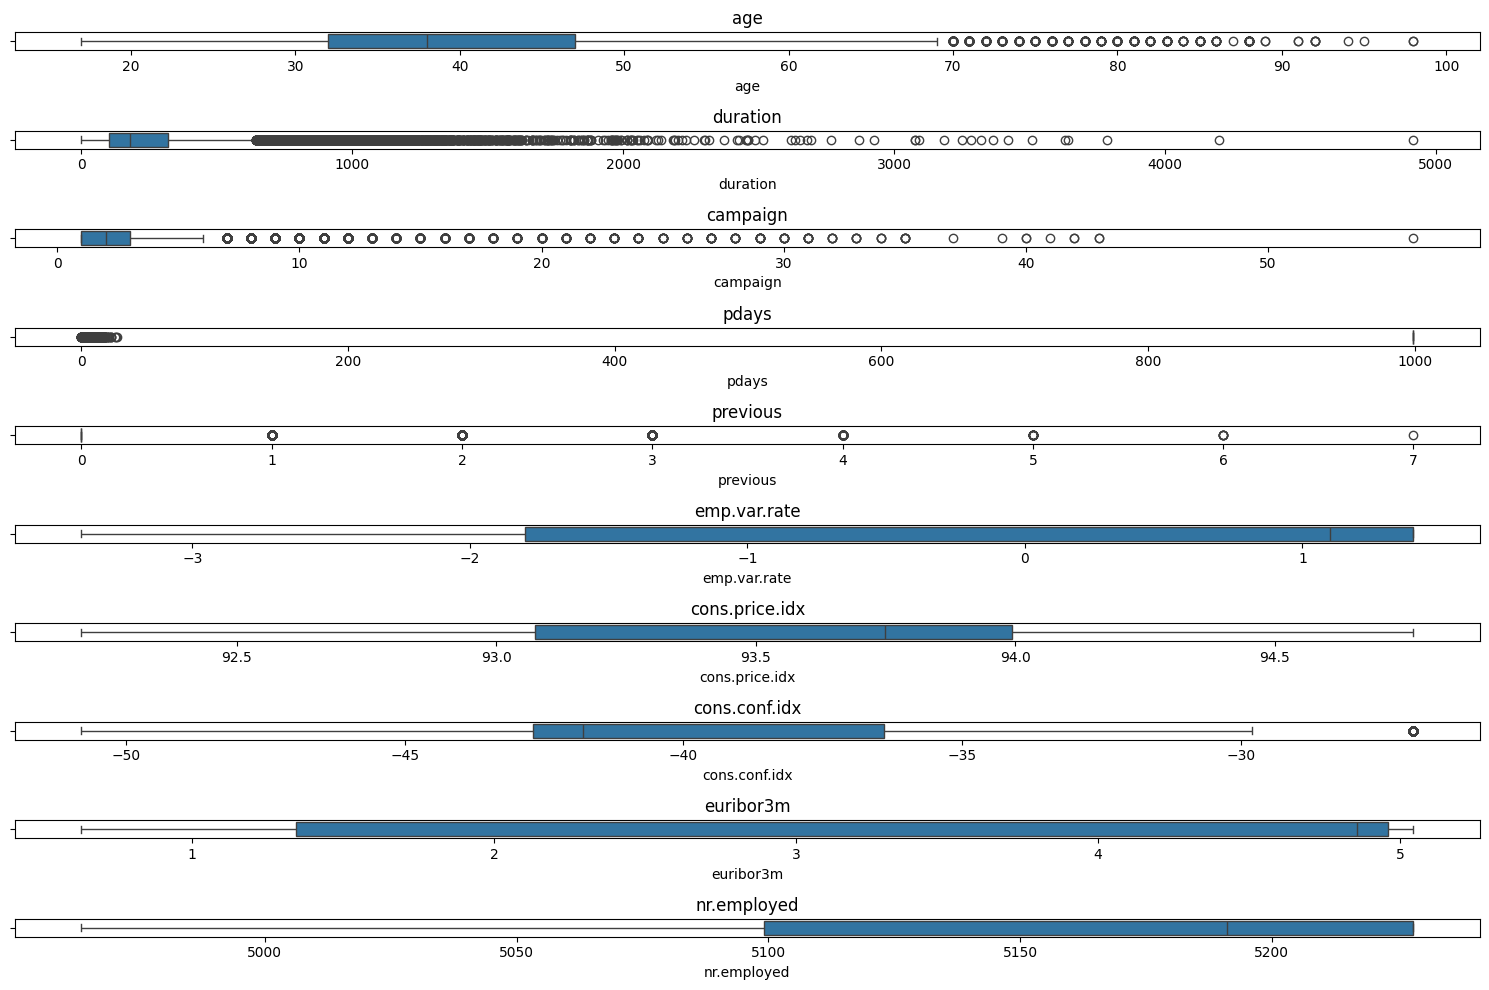

In [23]:
# Creating box plots for the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Data Visualization 

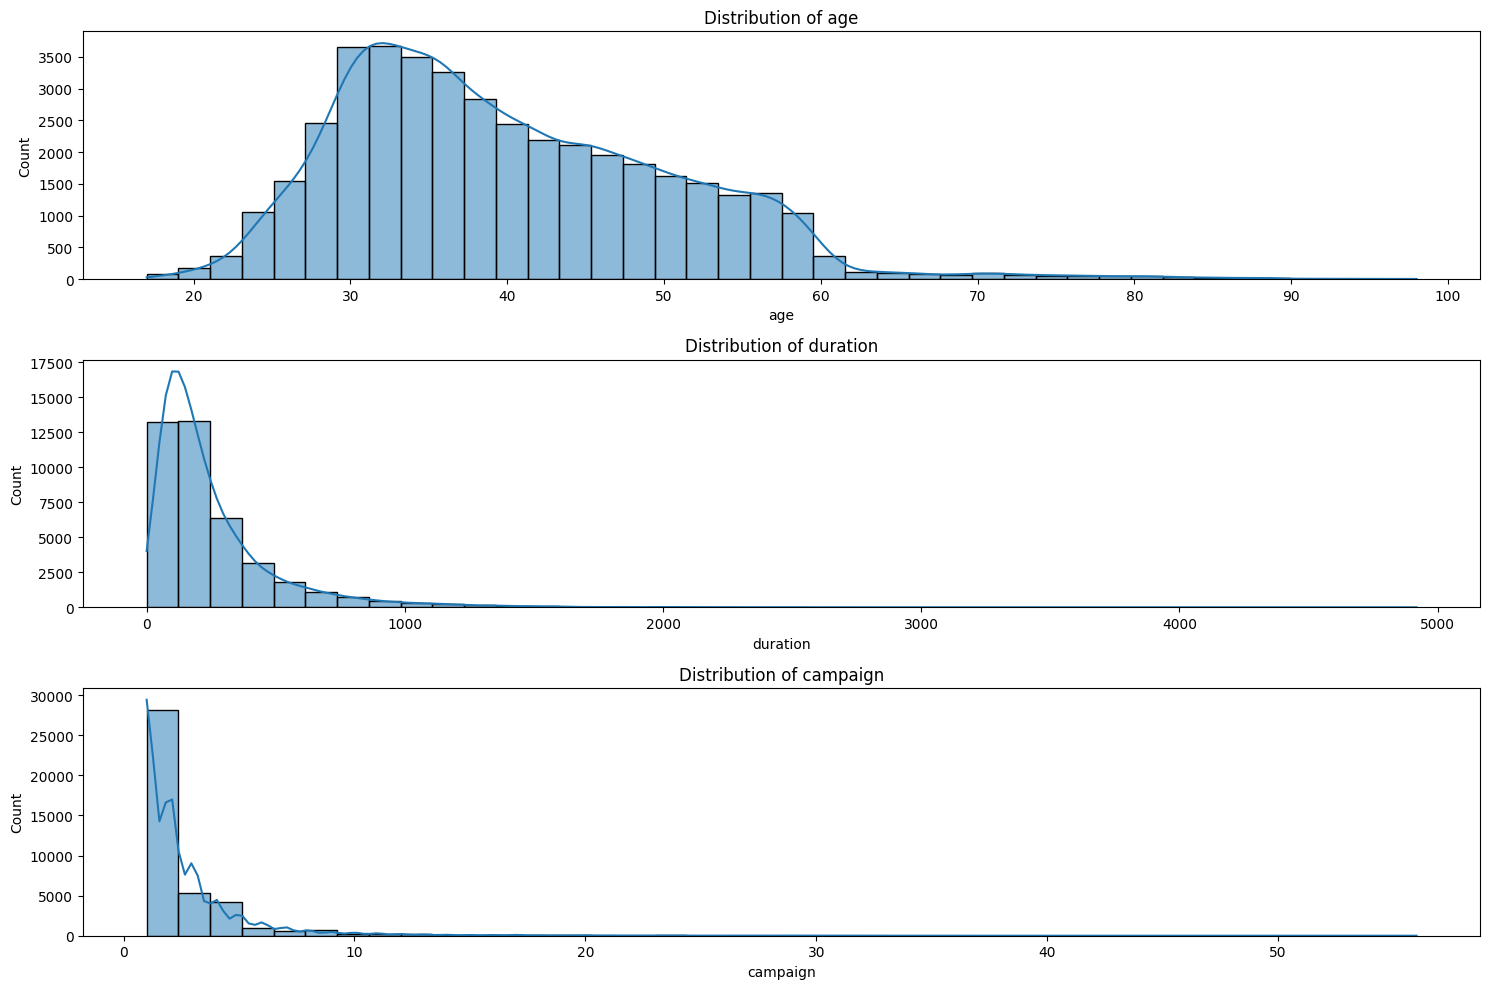

In [24]:
# Visualize the distribution of some numerical features after outlier handling
features_to_visualize = ['age', 'duration', 'campaign']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[feature], kde=True, bins=40)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


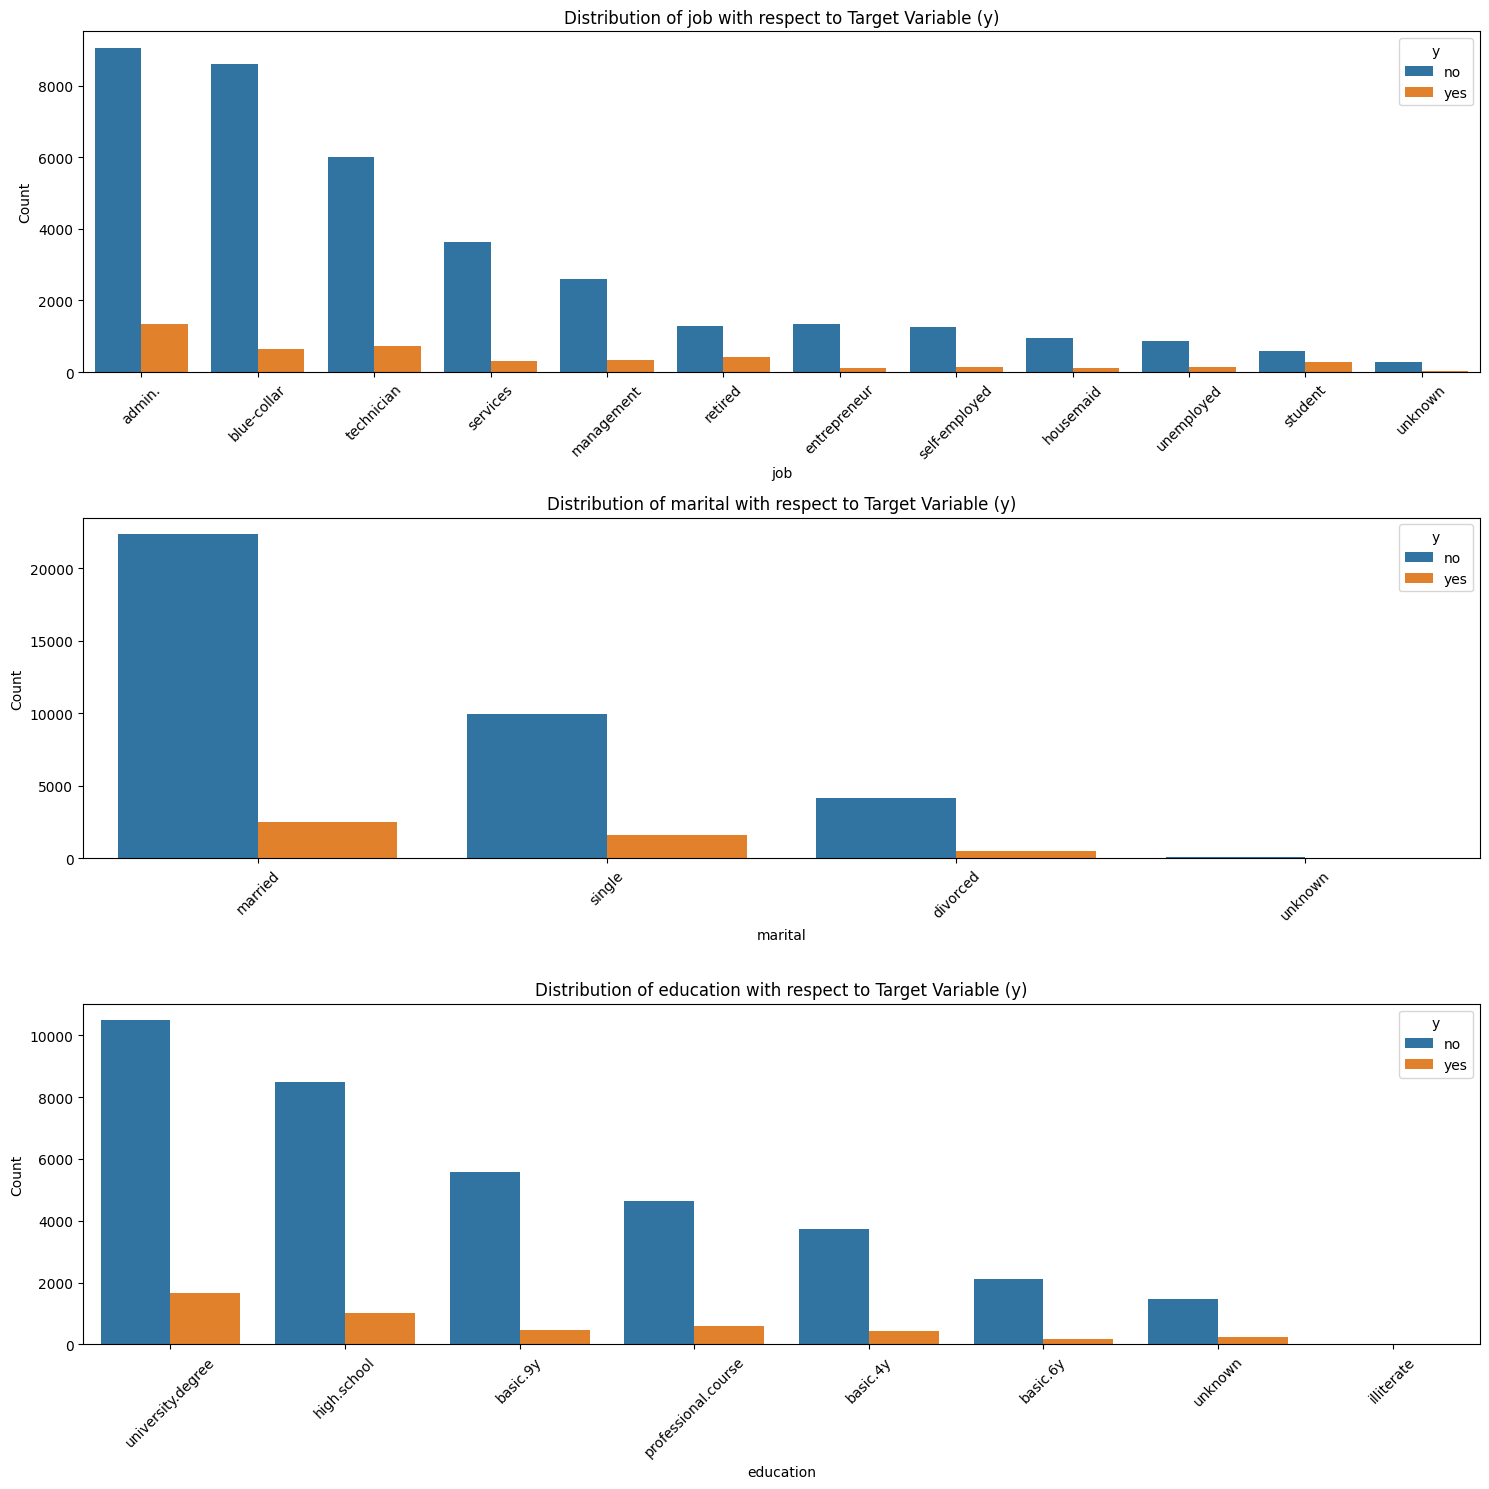

In [25]:
# Visualize the distribution of some categorical features with respect to the target variable 'y'
categorical_features = ['job', 'marital', 'education']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=feature, hue='y', data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} with respect to Target Variable (y)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

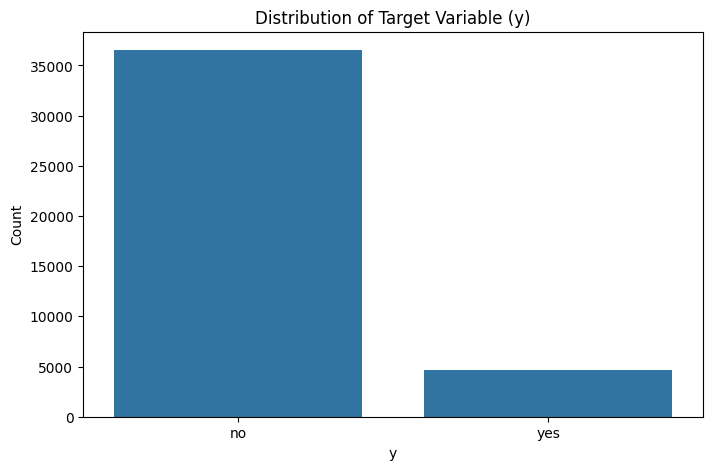

In [26]:
# Visualize the distribution of the target variable 'y'

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.ylabel('Count')
plt.show()

# Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split the data into training and test sets
X = df.drop('y', axis=1)
y = df['y'].map({'no':0,'yes':1})

# Split the data first to prevent information leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
for column in unknown_columns.index:
    mode_value = X_train[column].mode()[0] # use the mode values of t
    X_train[column] = X_train[column].replace('unknown', mode_value)
    X_test[column] = X_test[column].replace('unknown', mode_value)

In [29]:
percentiles = X_train[numerical_cols].quantile([0.01, 0.99]).to_dict()
percentiles

{'age': {0.01: 23.0, 0.99: 70.0},
 'duration': {0.01: 11.0, 0.99: 1259.0},
 'campaign': {0.01: 1.0, 0.99: 14.0},
 'pdays': {0.01: 3.0, 0.99: 999.0},
 'previous': {0.01: 0.0, 0.99: 2.0},
 'emp.var.rate': {0.01: -3.4, 0.99: 1.4},
 'cons.price.idx': {0.01: 92.201, 0.99: 94.465},
 'cons.conf.idx': {0.01: -49.5, 0.99: -26.9},
 'euribor3m': {0.01: 0.659, 0.99: 4.968},
 'nr.employed': {0.01: 4963.6, 0.99: 5228.1}}

In [30]:
# Capping the outliers
for col in numerical_cols:
    lower_cap = percentiles[col][0.01]
    upper_cap = percentiles[col][0.99]
    X_train[col] = X_train[col].clip(lower=lower_cap, upper=upper_cap)
    X_test[col] = X_test[col].clip(lower=lower_cap, upper=upper_cap)

# Convert '999' in 'pdays' to a separate categorical variable
X_train['pdays_contacted'] = X_train['pdays'].apply(lambda x: 0 if x == 999 else 1)
X_test['pdays_contacted'] = X_test['pdays'].apply(lambda x: 0 if x == 999 else 1)
# Now drop the original 'pdays' column as it is redundant with the new binary variable
X_train = X_train.drop('pdays', axis=1)
X_test = X_test.drop('pdays', axis=1)
numerical_cols_updated = numerical_cols.drop('pdays')

# Display the changes in the descriptive statistics for the capped data
capped_stats_comparison = pd.DataFrame({
    'Original': df[numerical_cols].describe().loc['mean'],
    'Capped': X_train[numerical_cols_updated].describe().loc['mean']
})

capped_stats_comparison, X_train[['pdays_contacted']].describe()

(                   Original       Capped
 age               40.023800    39.940048
 campaign           2.567879     2.493183
 cons.conf.idx    -40.502863   -40.490168
 cons.price.idx    93.575720    93.574194
 duration         258.315815   254.150678
 emp.var.rate       0.081922     0.082080
 euribor3m          3.621293     3.619492
 nr.employed     5167.034870  5166.924397
 pdays            962.464810          NaN
 previous           0.173013     0.163030,
        pdays_contacted
 count     28823.000000
 mean          0.037401
 std           0.189745
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000)

In [31]:
# Identify categorical and continuous columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [32]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

# Fit and transform the categorical columns
categorical_encoded = onehot_encoder.fit_transform(X_train[categorical_cols]).toarray()
# Transform the test set using the same encoder
categorical_encoded_test = onehot_encoder.transform(X_test[categorical_cols]).toarray()

# Fit and transform the numerical columns
numerical_scaled = scaler.fit_transform(X_train[numerical_cols])
# Transform the test set using the same scaler
numerical_scaled_test = scaler.transform(X_test[numerical_cols])

# Convert to DataFrame
categorical_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_train.index)
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_cols, index=X_train.index)

# Concatenate along the columns
X_train_processed = pd.concat([numerical_df, categorical_df], axis=1)

# Repeat for test set
categorical_df_test = pd.DataFrame(categorical_encoded_test, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_test.index)
numerical_df_test = pd.DataFrame(numerical_scaled_test, columns=numerical_cols, index=X_test.index)
X_test_processed = pd.concat([numerical_df_test, categorical_df_test], axis=1)

# Now X_train_processed and X_test_processed have both the scaled numerical features and one-hot encoded categorical features


Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Dictionary to store cross-validation results
cv_results = {}

# Initialize the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation
lr_scores_accuracy = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='accuracy')
lr_scores_precision = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='precision')
lr_scores_recall = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='recall')
lr_scores_f1 = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='f1')
cv_results['Logistic Regression'] = {'accuracy':lr_scores_accuracy.mean(), 'precision':lr_scores_precision.mean(),'recall':lr_scores_recall.mean(),'f1':lr_scores_f1.mean()}

cv_results['Logistic Regression']

{'accuracy': 0.9122575870928988,
 'precision': 0.662644610295007,
 'recall': 0.4502647860613963,
 'f1': 0.5361628743480686}

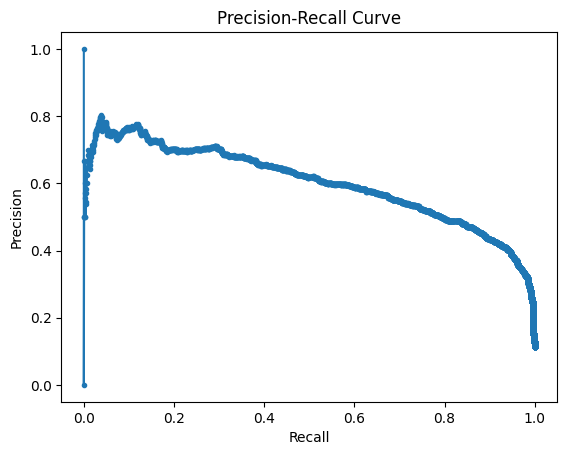

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = lr_model.predict_proba(X_test_processed)[:, 1]

# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


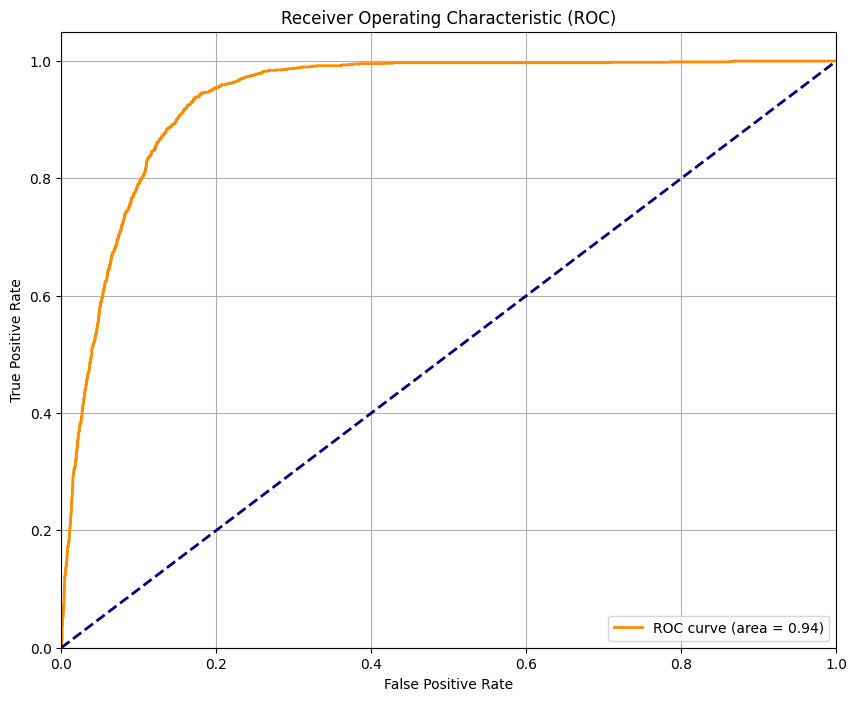

In [35]:
from sklearn.metrics import roc_curve, auc

# Fit the model on the entire training set
lr_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = lr_model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores_accuracy = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='accuracy')
dt_scores_precision = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='precision')
dt_scores_recall = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='recall')
dt_scores_f1 = cross_val_score(dt_model, X_train_processed, y_train, cv=5, scoring='f1')
cv_results['Decision Tree'] = {'accuracy': dt_scores_accuracy.mean(), 'precision':dt_scores_precision.mean(),'recall':dt_scores_recall.mean(),'f1':dt_scores_f1.mean()}

cv_results['Decision Tree']



{'accuracy': 0.8893939353814357,
 'precision': 0.5090548121496983,
 'recall': 0.5210975465212754,
 'f1': 0.5147512889350286}

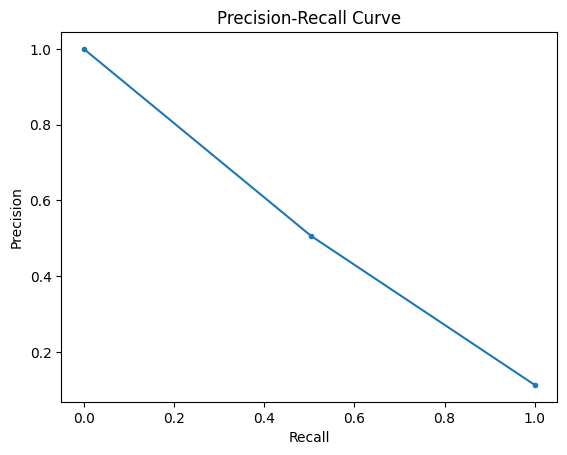

In [37]:
dt_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = dt_model.predict_proba(X_test_processed)[:, 1]


# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

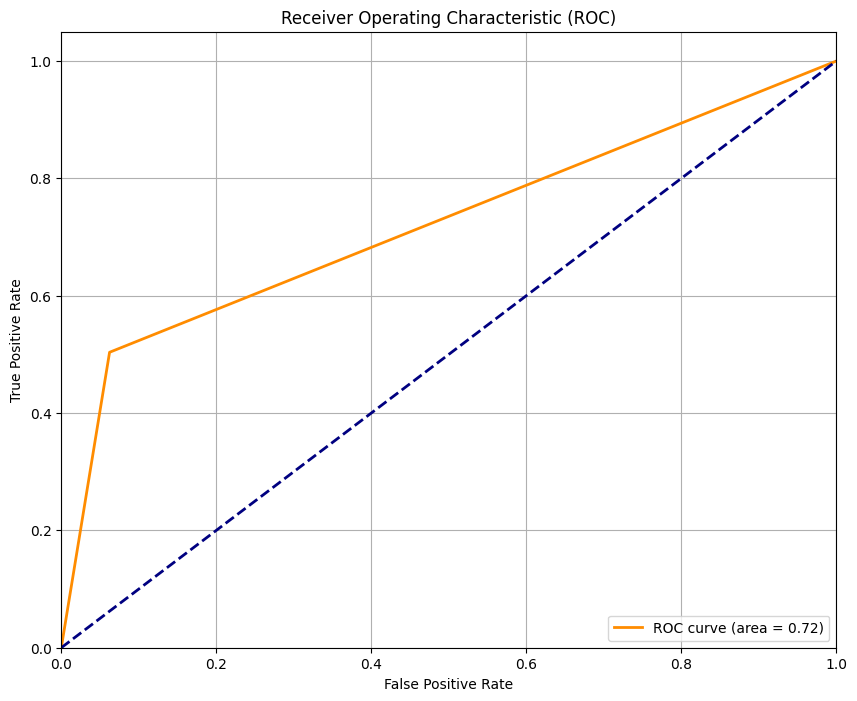

In [38]:
# Fit the model on the entire training set
dt_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = dt_model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_scores_accuracy = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='accuracy')
rf_scores_precision = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='precision')
rf_scores_recall = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='recall')
rf_scores_f1 = cross_val_score(rf_model, X_train_processed, y_train, cv=5, scoring='f1')
cv_results['Random Forest'] = {'accuracy':rf_scores_accuracy.mean(), 'precision':rf_scores_precision.mean(),'recall':rf_scores_recall.mean(),'f1':rf_scores_f1.mean()}

cv_results['Random Forest']

{'accuracy': 0.9136799213709763,
 'precision': 0.6723252625246026,
 'recall': 0.4564129429892141,
 'f1': 0.5435672313599963}

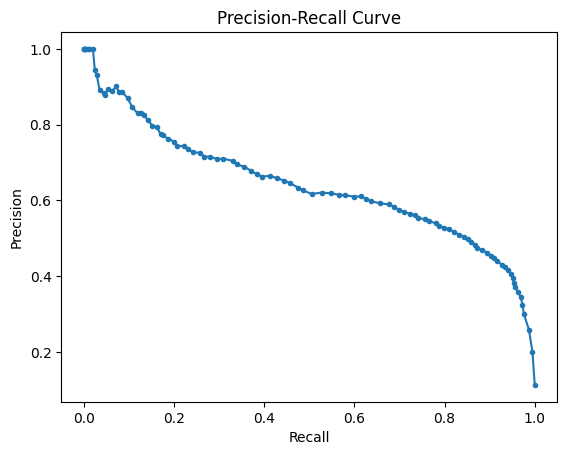

In [40]:
rf_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = rf_model.predict_proba(X_test_processed)[:, 1]


# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

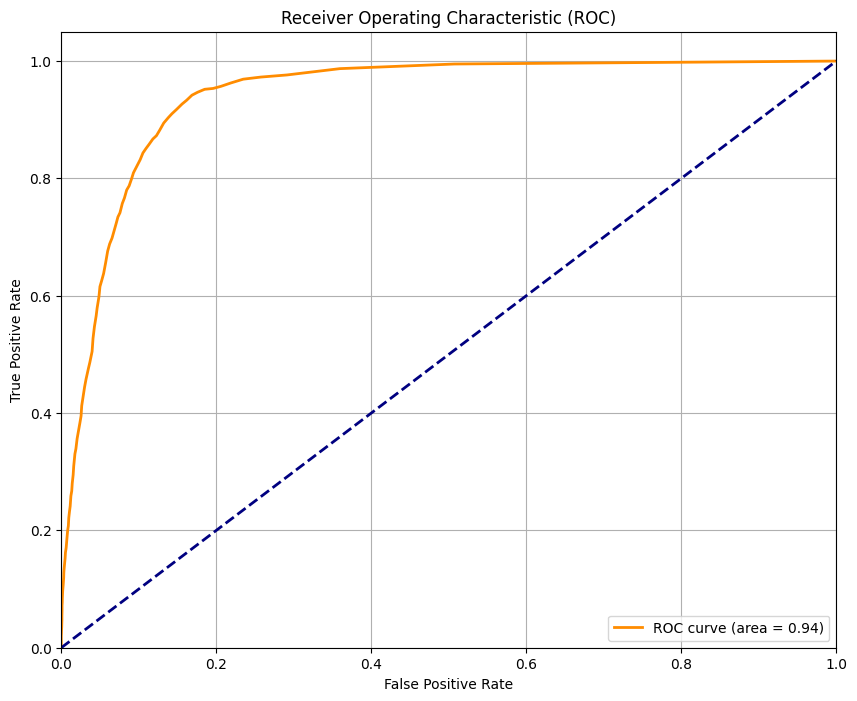

In [41]:
# Fit the model on the entire training set
rf_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = rf_model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


XGBoost

In [42]:
import xgboost as xgb
# XGBoost
xgb_param = dict(n_estimators = 1000,max_depth = 20, learning_rate = 0.01,random_state = 42)
xgb_model = xgb.XGBClassifier(**xgb_param)
xgb_model_scores_accuracy = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='accuracy')
xgb_model_scores_precision = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='precision')
xgb_model_scores_recall = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='recall')
xgb_model_scores_f1 = cross_val_score(xgb_model, X_train_processed, y_train, cv=5, scoring='f1')
cv_results['XGBoost'] = {'accuracy':xgb_model_scores_accuracy.mean(), 'precision':xgb_model_scores_precision.mean(),'recall':xgb_model_scores_recall.mean(),'f1':xgb_model_scores_f1.mean()}

cv_results['XGBoost']

{'accuracy': 0.9109391365372774,
 'precision': 0.6217292869909634,
 'recall': 0.5346502311248074,
 'f1': 0.5748916632584244}

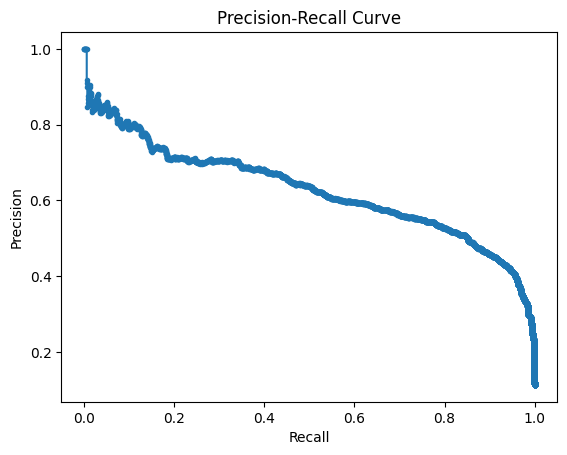

In [43]:
xgb_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]


# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

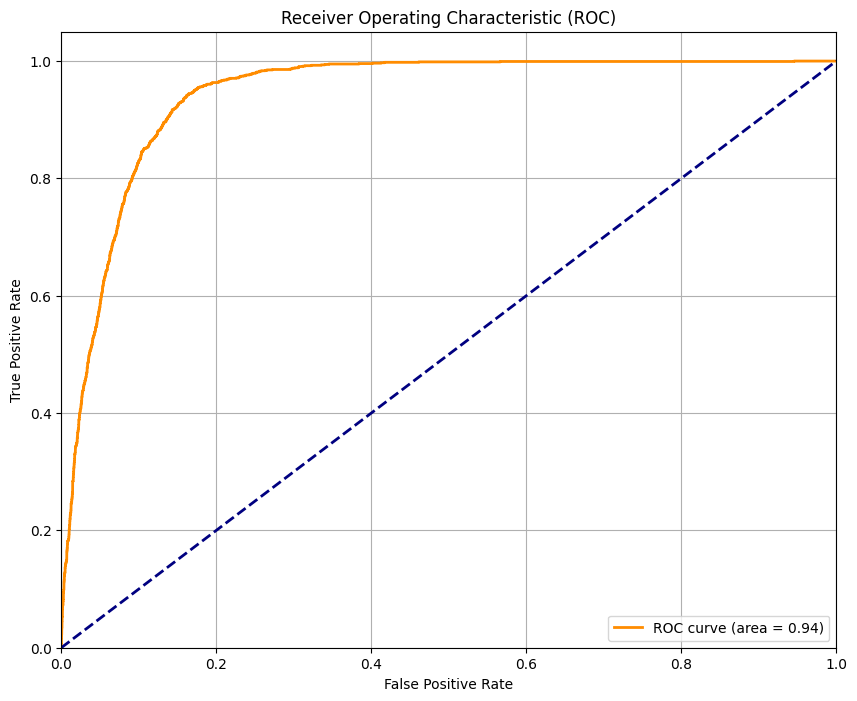

In [44]:
# Fit the model on the entire training set
xgb_model.fit(X_train_processed, y_train)

# Predict the probabilities of the positive class
y_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


ANN

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow_addons as tfa

# Determine the number of input features
input_dim = X_train_processed.shape[1]

# Define the ANN model
model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

# Train the ANN model
history = model.fit(X_train_processed, y_train, validation_data=(X_test_processed, y_test), epochs=100, batch_size=10, verbose=0)

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_processed)

# Convert probabilities to class labels using a threshold of 0.5
y_pred_labels = (y_pred_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

cv_results['ANN'] = {'accuracy':accuracy, 'precision':precision,'recall':recall,'f1':f1}

cv_results['ANN']


387/387 [==============================] - 0s 245us/step


{'accuracy': 0.9095766210637092,
 'precision': 0.6152556580050293,
 'recall': 0.5272988505747126,
 'f1': 0.5678916827852998}

In [46]:
y_pred_probs[0]

array([0.06517044], dtype=float32)

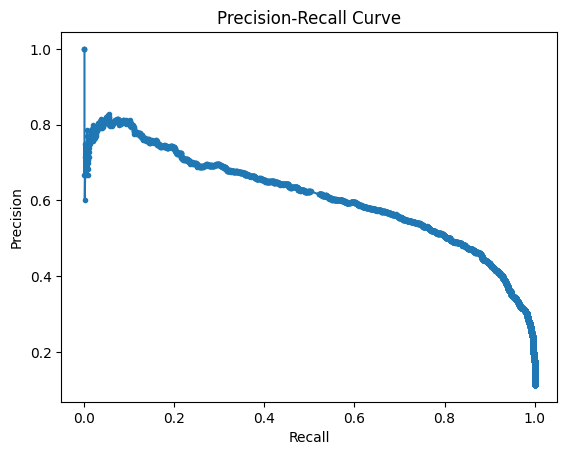

In [47]:
# Predict the probabilities of the positive class
# y_pred_proba = model.predict_proba(X_test_processed)[:, 1]


# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

387/387 [==============================] - 0s 293us/step


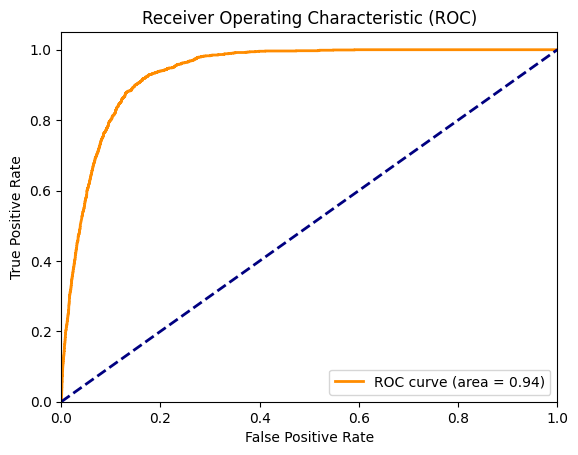

In [48]:
y_pred_probs = model.predict(X_test_processed).ravel()

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [49]:
cv_results_df = pd.DataFrame.from_dict(cv_results)

cv_results_df

,Logistic Regression,Decision Tree,Random Forest,XGBoost,ANN
accuracy,0.912258,0.889394,0.913680,0.910939,0.909577
precision,0.662645,0.509055,0.672325,0.621729,0.615256
recall,0.450265,0.521098,0.456413,0.534650,0.527299
f1,0.536163,0.514751,0.543567,0.574892,0.567892


# Adding more features

In [50]:
# May 2008 to November 2010
_year = 2008
year_lst = []
for i,j in zip(df.month, df.month.shift(1)):
    if i != 'dec' and j == 'dec':
        _year += 1
    year_lst.append(_year)

In [51]:
df['year'] = year_lst

In [52]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010


In [53]:
from dotenv import load_dotenv
from fredapi import Fred
import os
load_dotenv()
fred_key = '9cb9297e959a67d707fab8eaf04a31fb'
fred = Fred(api_key = fred_key)

In [115]:
# T10Y2Y = 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
# CBOE S&P 500 3-Month Volatility Index
serie_list = ['GDPC1', 'INDPRO', 'JTSJOL', 'UNRATE', 'CES0500000003']

info_lst = []
df_lst = []

for serie in serie_list:
    print(serie)
    a = fred.get_series_info(serie).to_frame().T
    b = fred.get_series(serie).to_frame(name=serie)
    info_lst.append(a)
    df_lst.append(b)

GDPC1
INDPRO
JTSJOL
UNRATE
CES0500000003


In [116]:
info_df = pd.concat(info_lst)

In [117]:
_df = pd.concat(df_lst,axis = 1)

In [118]:
_df['year'] = _df.index.year
_df['month'] = _df.index.month

In [119]:
_df['month'] = _df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
_df = _df.ffill().resample('M').last()

In [120]:
new_df = df.merge(_df, on = ['month','year'], how = 'left')
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,year,GDPC1,INDPRO,JTSJOL,UNRATE,CES0500000003
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,2008,16943.291,100.132,4194.0,5.4,21.47
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,2008,16943.291,100.132,4194.0,5.4,21.47
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,2008,16943.291,100.132,4194.0,5.4,21.47
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,2008,16943.291,100.132,4194.0,5.4,21.47
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,2008,16943.291,100.132,4194.0,5.4,21.47


In [121]:
# Split the data into training and test sets
new_X = new_df.drop('y', axis=1)
new_y = new_df['y'].map({'no':0,'yes':1})

# Split the data first to prevent information leakage
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, stratify=y, random_state=42)

In [122]:
unknown_counts = new_df[new_df == 'unknown'].count()
unknown_columns = unknown_counts[unknown_counts > 0]
numerical_cols = new_df.select_dtypes(include=['int64', 'float64']).columns


for column in unknown_columns.index:
    mode_value = X_train[column].mode()[0] # use the mode values of t
    X_train[column] = X_train[column].replace('unknown', mode_value)
    X_test[column] = X_test[column].replace('unknown', mode_value)

In [123]:
percentiles = X_train[numerical_cols].quantile([0.01, 0.99]).to_dict()
percentiles

{'age': {0.01: 23.0, 0.99: 70.0},
 'duration': {0.01: 11.0, 0.99: 1259.0},
 'campaign': {0.01: 1.0, 0.99: 14.0},
 'pdays': {0.01: 3.0, 0.99: 999.0},
 'previous': {0.01: 0.0, 0.99: 2.0},
 'emp.var.rate': {0.01: -3.4, 0.99: 1.4},
 'cons.price.idx': {0.01: 92.201, 0.99: 94.465},
 'cons.conf.idx': {0.01: -49.5, 0.99: -26.9},
 'euribor3m': {0.01: 0.659, 0.99: 4.968},
 'nr.employed': {0.01: 4963.6, 0.99: 5228.1},
 'year': {0.01: 2008.0, 0.99: 2010.0},
 'GDPC1': {0.01: 16269.145, 0.99: 16943.291},
 'INDPRO': {0.01: 84.6928, 0.99: 100.132},
 'JTSJOL': {0.01: 2295.0, 0.99: 4194.0},
 'UNRATE': {0.01: 5.4, 0.99: 10.0},
 'CES0500000003': {0.01: 21.47, 0.99: 22.67}}

In [124]:
# Capping the outliers
for col in numerical_cols:
    lower_cap = percentiles[col][0.01]
    upper_cap = percentiles[col][0.99]
    X_train[col] = X_train[col].clip(lower=lower_cap, upper=upper_cap)
    X_test[col] = X_test[col].clip(lower=lower_cap, upper=upper_cap)

# Convert '999' in 'pdays' to a separate categorical variable
X_train['pdays_contacted'] = X_train['pdays'].apply(lambda x: 0 if x == 999 else 1)
X_test['pdays_contacted'] = X_test['pdays'].apply(lambda x: 0 if x == 999 else 1)
# Now drop the original 'pdays' column as it is redundant with the new binary variable
X_train = X_train.drop('pdays', axis=1)
X_test = X_test.drop('pdays', axis=1)
numerical_cols_updated = numerical_cols.drop('pdays')

# Display the changes in the descriptive statistics for the capped data
capped_stats_comparison = pd.DataFrame({
    'Original': new_df[numerical_cols].describe().loc['mean'],
    'Capped': X_train[numerical_cols_updated].describe().loc['mean']
})

capped_stats_comparison, X_train[['pdays_contacted']].describe()

(                    Original        Capped
 CES0500000003      21.801393     21.801778
 GDPC1           16690.171120  16690.425068
 INDPRO             94.636093     94.635216
 JTSJOL           3390.735817   3390.944419
 UNRATE              7.011767      7.014402
 age                40.023800     39.940048
 campaign            2.567879      2.493183
 cons.conf.idx     -40.502863    -40.490168
 cons.price.idx     93.575720     93.574194
 duration          258.315815    254.150678
 emp.var.rate        0.081922      0.082080
 euribor3m           3.621293      3.619492
 nr.employed      5167.034870   5166.924397
 pdays             962.464810           NaN
 previous            0.173013      0.163030
 year             2008.377696   2008.379107,
        pdays_contacted
 count     28823.000000
 mean          0.037401
 std           0.189745
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000)

In [125]:
# Identify categorical and continuous columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [126]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

# Fit and transform the categorical columns
categorical_encoded = onehot_encoder.fit_transform(X_train[categorical_cols]).toarray()
# Transform the test set using the same encoder
categorical_encoded_test = onehot_encoder.transform(X_test[categorical_cols]).toarray()

# Fit and transform the numerical columns
numerical_scaled = scaler.fit_transform(X_train[numerical_cols])
# Transform the test set using the same scaler
numerical_scaled_test = scaler.transform(X_test[numerical_cols])

# Convert to DataFrame
categorical_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_train.index)
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_cols, index=X_train.index)

# Concatenate along the columns
new_X_train_processed = pd.concat([numerical_df, categorical_df], axis=1)

# Repeat for test set
categorical_df_test = pd.DataFrame(categorical_encoded_test, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=X_test.index)
numerical_df_test = pd.DataFrame(numerical_scaled_test, columns=numerical_cols, index=X_test.index)
new_X_test_processed = pd.concat([numerical_df_test, categorical_df_test], axis=1)

# Now new_X_train_processed and new_X_test_processed have both the scaled numerical features and one-hot encoded categorical features


In [127]:
new_X_train_processed.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'year',
       'GDPC1', 'INDPRO', 'JTSJOL', 'UNRATE', 'CES0500000003',
       'pdays_contacted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [133]:
# Dictionary to store cross-validation results
new_cv_results = {}

# Perform cross-validation
lr_scores_accuracy = cross_val_score(lr_model, new_X_train_processed, y_train, cv=5, scoring='accuracy')
lr_scores_precision = cross_val_score(lr_model, new_X_train_processed, y_train, cv=5, scoring='precision')
lr_scores_recall = cross_val_score(lr_model, new_X_train_processed, y_train, cv=5, scoring='recall')
lr_scores_f1 = cross_val_score(lr_model, new_X_train_processed, y_train, cv=5, scoring='f1')
new_cv_results['Logistic Regression'] = {'accuracy':lr_scores_accuracy.mean(), 'precision':lr_scores_precision.mean(),'recall':lr_scores_recall.mean(),'f1':lr_scores_f1.mean()}


# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores_accuracy = cross_val_score(dt_model, new_X_train_processed, y_train, cv=5, scoring='accuracy')
dt_scores_precision = cross_val_score(dt_model, new_X_train_processed, y_train, cv=5, scoring='precision')
dt_scores_recall = cross_val_score(dt_model, new_X_train_processed, y_train, cv=5, scoring='recall')
dt_scores_f1 = cross_val_score(dt_model, new_X_train_processed, y_train, cv=5, scoring='f1')
new_cv_results['Decision Tree'] = {'accuracy':dt_scores_accuracy.mean(), 'precision':dt_scores_precision.mean(),'recall':dt_scores_recall.mean(),'f1':dt_scores_f1.mean()}

# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_scores_accuracy = cross_val_score(rf_model, new_X_train_processed, y_train, cv=5, scoring='accuracy')
rf_scores_precision = cross_val_score(rf_model, new_X_train_processed, y_train, cv=5, scoring='precision')
rf_scores_recall = cross_val_score(rf_model, new_X_train_processed, y_train, cv=5, scoring='recall')
rf_scores_f1 = cross_val_score(rf_model, new_X_train_processed, y_train, cv=5, scoring='f1')
new_cv_results['Random Forest'] = {'accuracy':rf_scores_accuracy.mean(), 'precision':rf_scores_precision.mean(),'recall':rf_scores_recall.mean(),'f1':rf_scores_f1.mean()}

# XGBoost
xgb_param = dict(n_estimators = 1000,max_depth = 20, learning_rate = 0.01,random_state = 42)
xgb_model = xgb.XGBClassifier(**xgb_param)
xgb_model_scores_accuracy = cross_val_score(xgb_model, new_X_train_processed, y_train, cv=5, scoring='accuracy')
xgb_model_scores_precision = cross_val_score(xgb_model, new_X_train_processed, y_train, cv=5, scoring='precision')
xgb_model_scores_recall = cross_val_score(xgb_model, new_X_train_processed, y_train, cv=5, scoring='recall')
xgb_model_scores_f1 = cross_val_score(xgb_model, new_X_train_processed, y_train, cv=5, scoring='f1')
new_cv_results['XGBoost'] = {'accuracy':xgb_model_scores_accuracy.mean(), 'precision':xgb_model_scores_precision.mean(),'recall':xgb_model_scores_recall.mean(),'f1':xgb_model_scores_f1.mean()}

# Determine the number of input features
input_dim = new_X_train_processed.shape[1]

# Define the ANN model
model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

# Train the ANN model
history = model.fit(new_X_train_processed, y_train, validation_data=(new_X_test_processed, y_test), epochs=100, batch_size=10, verbose=0)

# Predict probabilities for the test set
y_pred_probs = model.predict(new_X_test_processed)

# Convert probabilities to class labels using a threshold of 0.5
y_pred_labels = (y_pred_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

new_cv_results['ANN'] = {'accuracy':accuracy, 'precision':precision,'recall':recall,'f1':f1}

new_cv_results_df = pd.DataFrame.from_dict(new_cv_results)

new_cv_results_df

387/387 [==============================] - 0s 236us/step


,Logistic Regression,Decision Tree,Random Forest,XGBoost,ANN
accuracy,0.912639,0.890088,0.912570,0.911494,0.907391
precision,0.665622,0.511892,0.671507,0.622011,0.601307
recall,0.450880,0.529417,0.439168,0.546352,0.528736
f1,0.537552,0.520457,0.530710,0.581719,0.562691


In [134]:
from sklearn.model_selection import GridSearchCV

class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.1, 0.5, 1],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'scale_pos_weight': [0.5 * scale_pos_weight, 
        0.75 * scale_pos_weight, 
        scale_pos_weight, 
        1.5 * scale_pos_weight, 
        2 * scale_pos_weight]}


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring = 'f1',
    n_jobs = 10,
    cv = 5,
)

grid_search.fit(new_X_train_processed, y_train)
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.7,
 'gamma': 0.5,
 'learning_rate': 0.01,
 'min_child_weight': 10,
 'n_estimators': 300,
 'scale_pos_weight': 3.9384046812442253}

In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Instantiate a new model with the best parameters
best_xgb_model = XGBClassifier(**best_params)

# Train the model on the training data
best_xgb_model.fit(new_X_train_processed, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(new_X_test_processed)
y_pred_proba = best_xgb_model.predict_proba(new_X_test_processed)[:, 1] 

# Choose a new threshold
new_threshold = 0.55

# Convert probabilities to 0 or 1 based on the new threshold
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10961
           1       0.55      0.80      0.65      1392

    accuracy                           0.90     12353
   macro avg       0.76      0.86      0.80     12353
weighted avg       0.93      0.90      0.91     12353



In [138]:
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': new_X_train_processed.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df.head() 

,Feature,Importance
8,nr.employed,0.273493
14,CES0500000003,0.259879
9,year,0.096555
1,duration,0.053500
4,emp.var.rate,0.037436
